In [174]:
## Import all the necessary Libraries

import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [175]:
## Loading the Dataset
df = pd.read_csv("creditcard.csv")

In [176]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [177]:
## Shape of dataframe
print(f"No of rows: {df.shape[0]}")
print(f"No of columns: {df.shape[1]}")

No of rows: 284807
No of columns: 31


In [178]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [179]:
## Check the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [180]:
## Check the data type of each columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [181]:
## Check for Null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [182]:
## Check for Duplicate rows
df.duplicated().sum()

1081

In [183]:
print(f"No of rows before removing duplicate: {df.shape[0]}")
print(20*"===")
df= df.drop_duplicates()
print(f"No of rows after removing duplicate: {df.shape[0]}")

No of rows before removing duplicate: 284807
No of rows after removing duplicate: 283726


## Outliers treatment
### We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

## Exploratory data Analysis - Visualizations

In [184]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Observe the distribution of classes with time

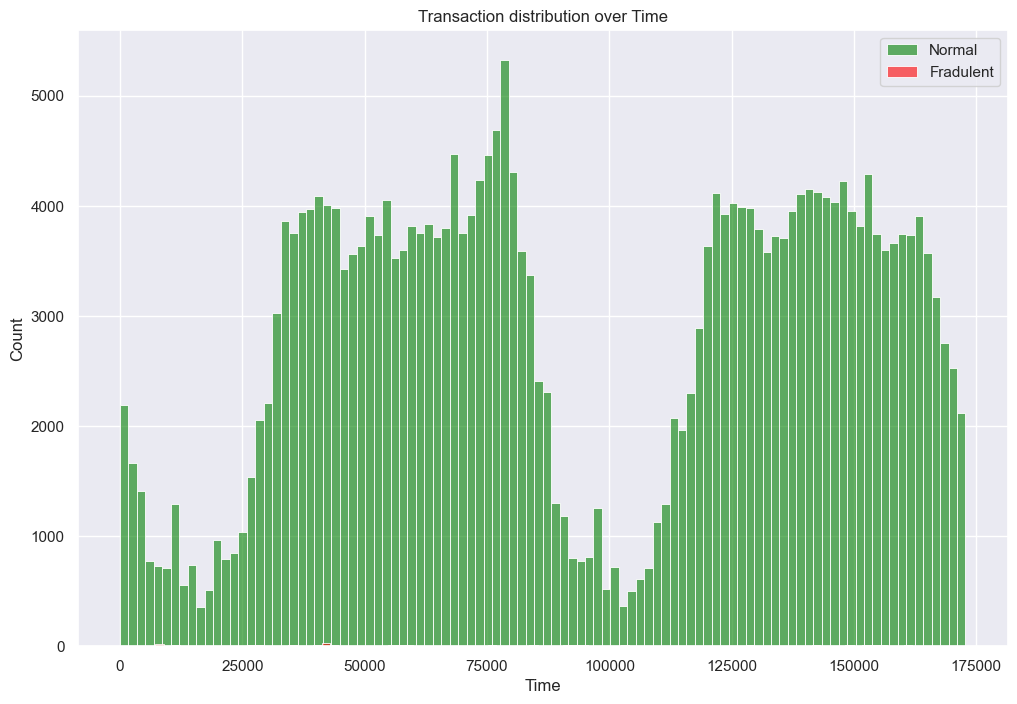

In [185]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Class']==0], x='Time', color='green', bins=100, label='Normal', alpha=0.6)
sns.histplot(data = df[df['Class']==1], x='Time', color='red', bins=100, label='Fradulent', alpha=0.6)
plt.legend()
plt.title("Transaction distribution over Time")
plt.show()

In [186]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

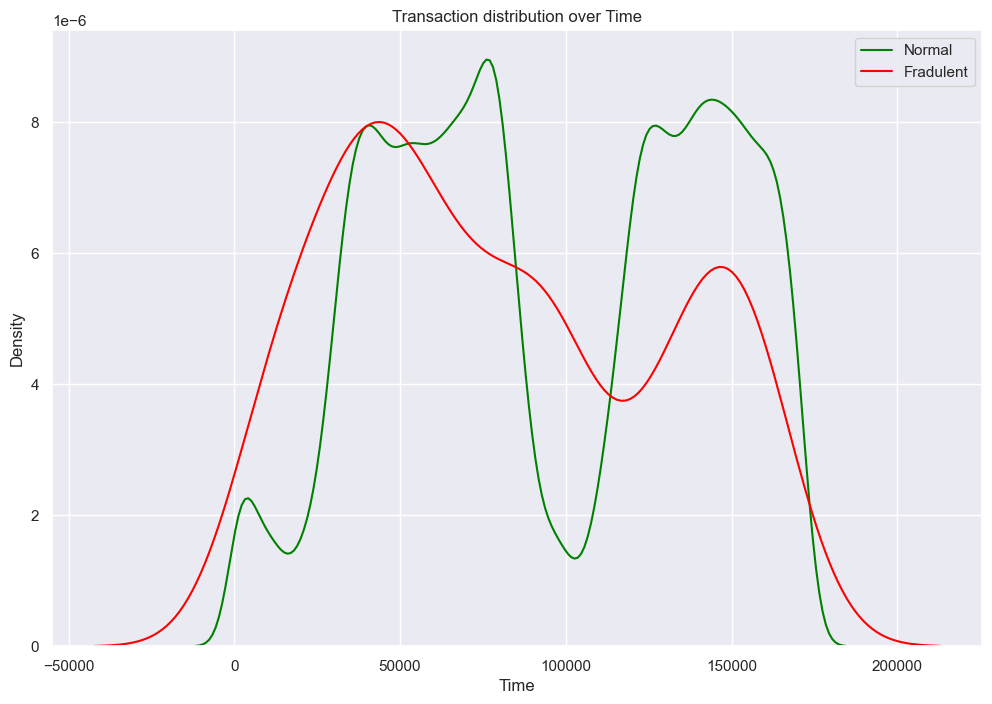

In [187]:
plt.figure(figsize=(12,8))
sns.distplot(data_non_fraud['Time'], color='green', bins=100, label='Normal', hist=False)
sns.distplot(data_fraud['Time'],color='red', bins=100, label='Fradulent', hist=False)
plt.legend()
plt.title("Transaction distribution over Time")
plt.show()

### Analysis:: 
#### We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [188]:
## Dropping the Time Column
df.drop('Time', axis = 1, inplace=True)

In [189]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Observe Distribution of Class with Respect to Amount

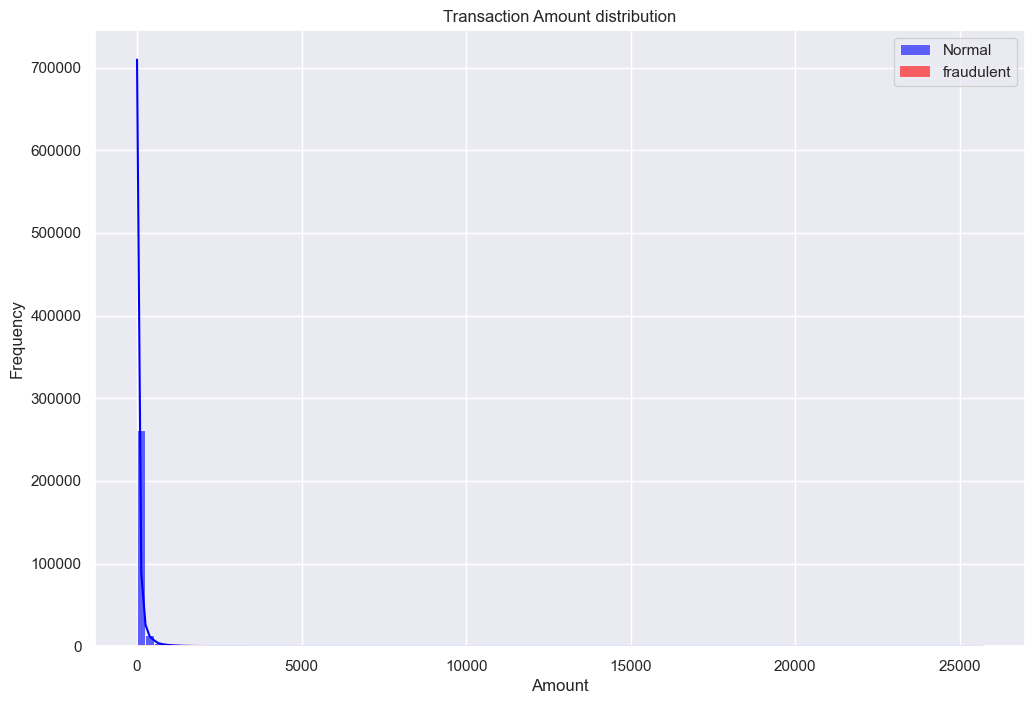

In [190]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Class']==0], x='Amount', color='blue', bins=100, label='Normal', alpha=0.6, kde= True)
sns.histplot(data = df[df['Class']==1], x='Amount', color='red', bins=100, label='fraudulent', alpha=0.6, kde= True)
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title("Transaction Amount distribution")
plt.show()

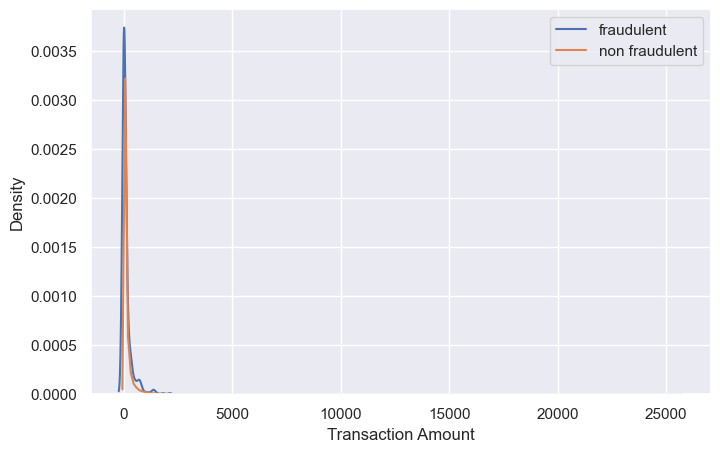

In [191]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.kdeplot(data=data_fraud['Amount'], label='fraudulent')
ax = sns.kdeplot(data=data_non_fraud['Amount'], label='non fraudulent')
ax.set(xlabel='Transaction Amount')
ax.legend()
plt.show()

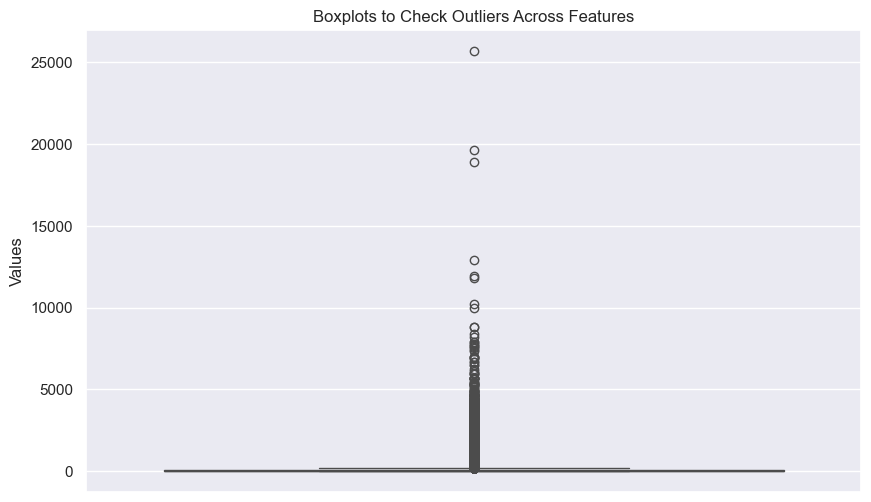

In [192]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Amount'])

# Customize the plot
plt.title('Boxplots to Check Outliers Across Features')
plt.ylabel('Values')

plt.show()

### Analysis
#### We can see that the fraudulent and non-fraudulent transactions are mostly densed in the lower range of amount

## Correlation Matrix

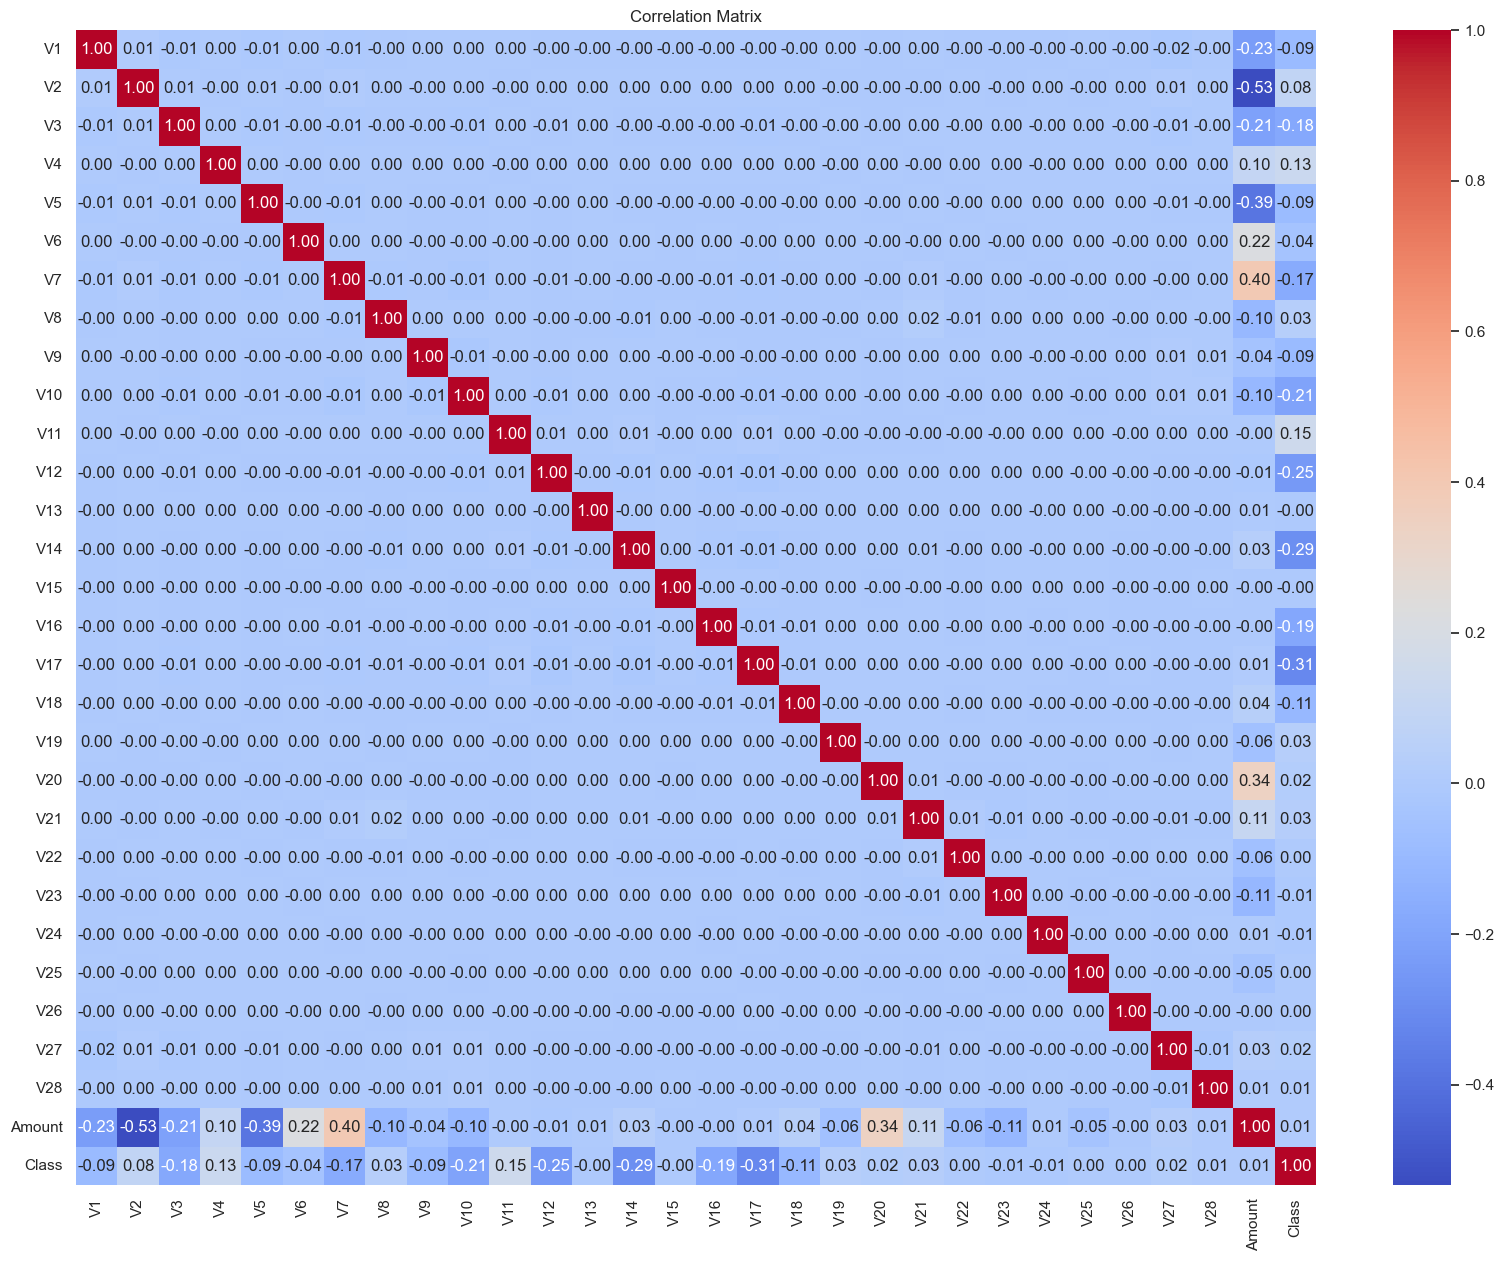

In [193]:
cm = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot= True, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

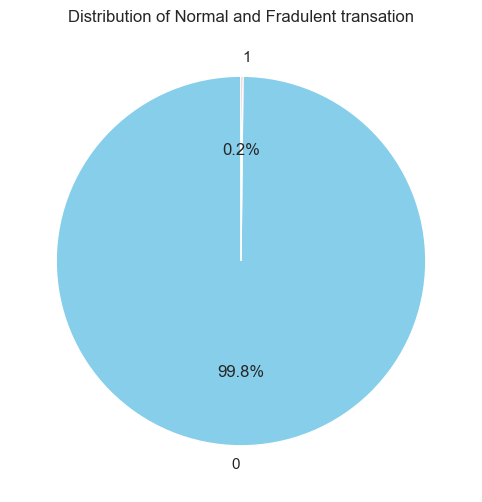

In [194]:
# Create a figure for the pie chart with a specified size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'loan_status' column as a pie chart
# - value_counts() counts the number of occurrences of each category
# - kind='pie' specifies the chart type
# - autopct='%1.1f%%' displays percentages with 1 decimal place
# - startangle=90 rotates the chart for better orientation
# - colors assigns custom colors to the slices
df['Class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

# Set the title of the pie chart
plt.title('Distribution of Normal and Fradulent transation')

# Remove the y-axis label for a cleaner look (not needed in pie charts)
plt.ylabel('')

# Display the chart
plt.show()

## Feature selection

In [195]:
## Putting features variables into x
x = df.drop('Class', axis=1)

In [196]:
## Putting target variables 'Class' into y
y = df['Class']

In [197]:
print(f"Shape of feature variables: {x.shape}\n")
print(f"Shape of target variable: {y.shape}\n")

Shape of feature variables: (283726, 29)

Shape of target variable: (283726,)



In [198]:
Classes = df['Class'].value_counts()
Classes

Class
0    283253
1       473
Name: count, dtype: int64

In [199]:
normal_transaction = round(Classes[0]/len(df['Class'])*100,2)
normal_transaction

99.83

In [200]:
fraud_transaction = round(Classes[1]/len(df['Class'])*100,2)
fraud_transaction

0.17

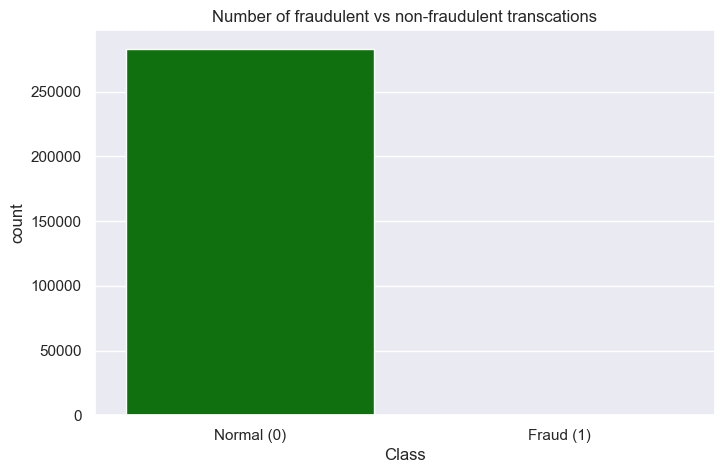

In [201]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, color='green')
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
plt.show()

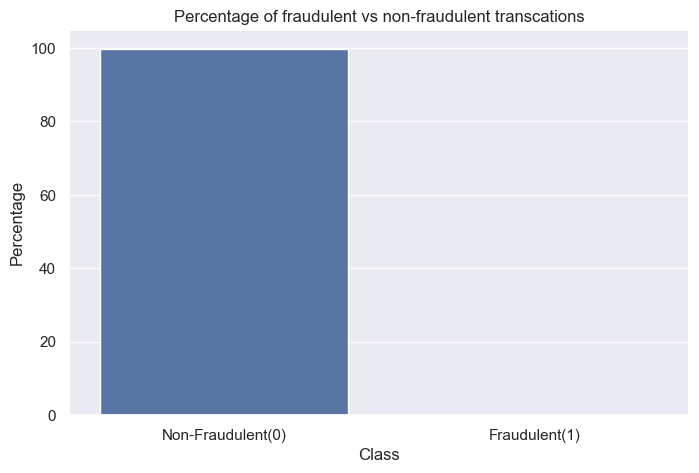

In [202]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent(0)', 'Fraudulent(1)'], 'Percentage':[normal_transaction, fraud_transaction]} 
plt.figure(figsize=(8, 5))
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

### From the above analysis, it seems data is highly imbalanced. We will have to balance the data using a sampling technique, either via the SMOTE technique, which is used for oversampling or undersampling the data which is not recommended as we loss the important information from the data. Before we apply the SMOTE Method, let's split the data into train and test

In [203]:
## Splitting the data into Train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Oversampling technique using SMOTE

In [204]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)
# Fitting SMOTE to the train set
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [205]:
print('Before SMOTE oversampling y_train data shape =',y_train.value_counts())
print(20*"===")
print('After SMOTE oversampling y_train shape=',y_train_smote.value_counts())

Before SMOTE oversampling y_train data shape = Class
0    226597
1       383
Name: count, dtype: int64
After SMOTE oversampling y_train shape= Class
0    226597
1    226597
Name: count, dtype: int64


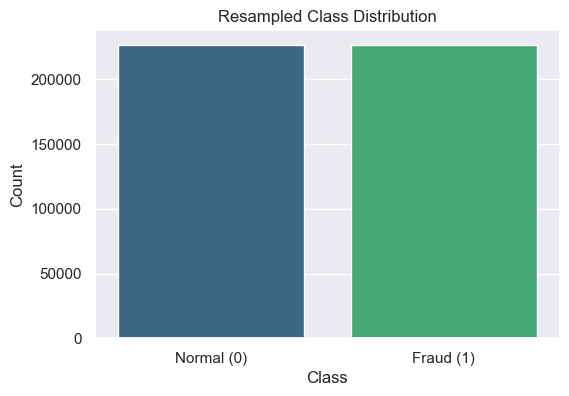

In [206]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='viridis')
# Set the title of the plot
plt.title('Resampled Class Distribution')
# Label the x-axis
plt.xlabel('Class')
# Label the y-axis
plt.ylabel('Count')
# Added custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
# Display the plot
plt.show()

## Normalisation/Encoding the data

In [207]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Since All the independent variables (V1 to V28) are already scaled, we will be ignoring them and will be applying StandardScaler only on Amount variable for scaling

In [208]:
# Standardization method
from sklearn.preprocessing import StandardScaler

## Instatiate Scaler
scaler  = StandardScaler()

### Peform Scaling on the training data
x_train_smote['Amount'] = scaler.fit_transform(x_train_smote[['Amount']])

In [209]:
x_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.918472
1,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.272644
2,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.328417
3,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.385697
4,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.370258


In [210]:
## We don't fit the Scaler on the test dataset, We only transform the test set.
x_test['Amount'] = scaler.transform(x_test[['Amount']])

In [211]:
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,-0.349941,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,-0.175992
134356,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,4.728060,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,-0.370969
42637,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,-0.172838,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,-0.219256
882,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,-0.174777,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,-0.397078
263275,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,-0.115561,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,-0.400174


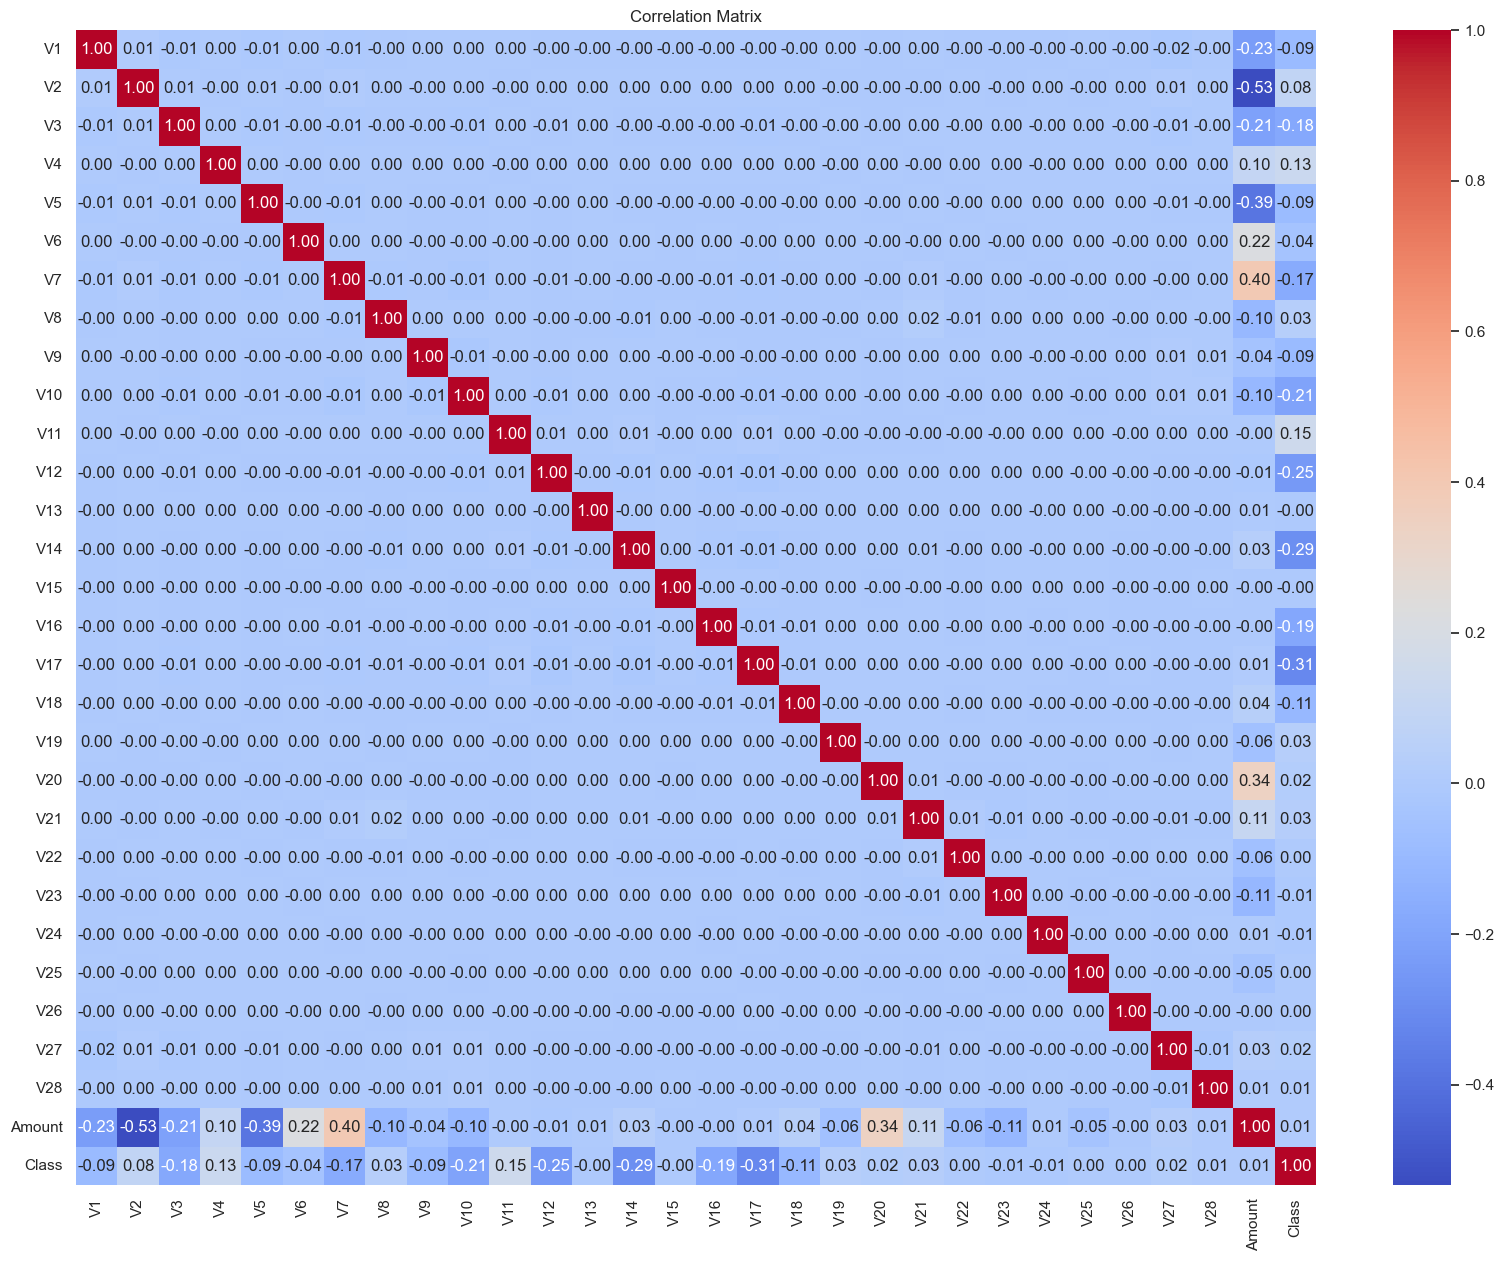

In [212]:
cm = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot= True, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [213]:
## Writing a resunable function to evaludate the model
def evaluate_model(model,pred):
    
    test_acc=accuracy_score(y_test,pred)
    test_prec=precision_score(y_test,pred)
    test_recall=recall_score(y_test,pred)
    test_f1=f1_score(y_test,pred)

    print(f'Testing Accuracy: {test_acc}\n')
    print(f'Precision: {test_prec}\n')
    print(f'Recall: {test_recall}\n')
    print(f'F1 Score: {test_f1}\n')
    print(20*"====+")
    print(f'classification report:\n {classification_report(y_test,pred)}')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')  # X-axis: model predictions
    plt.ylabel('Actual Label')  # Y-axis: 
    plt.show()
    print(20*"====+")
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, pred)

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve (AUC = {auc_score:.2f})')
    plt.show()

    model_score = [test_acc, test_prec, test_f1, test_recall, auc_score]
    return model_score

In [214]:
score = pd.DataFrame(index = ['Accuracy Test','Precision Test','Recall Test', 'F1 Test','roc auc score'])
score = score.sort_values(by='Accuracy Test', ascending=False, axis=1)

### Logistic Regression Model

In [215]:
lr_model = LogisticRegression()
lr_model.fit(x_train_smote, y_train_smote)
y_lr_pred = lr_model.predict(x_test)

Testing Accuracy: 0.9821132767067282

Precision: 0.07215541165587419

Recall: 0.8666666666666667

F1 Score: 0.1332194705380017

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.07      0.87      0.13        90

    accuracy                           0.98     56746
   macro avg       0.54      0.92      0.56     56746
weighted avg       1.00      0.98      0.99     56746



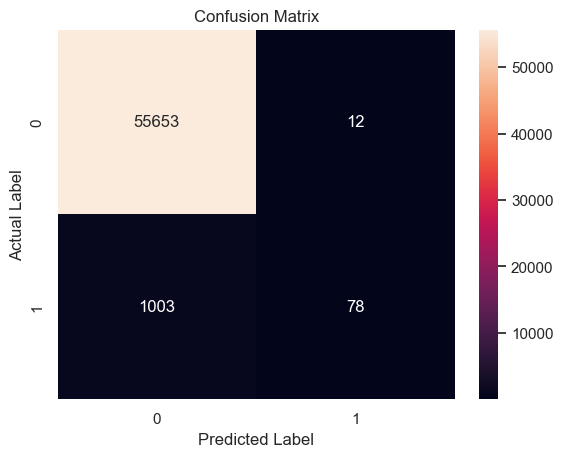

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


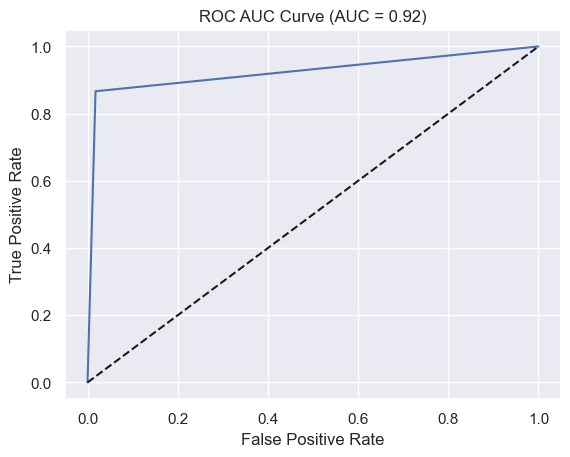

In [216]:
lr_score = evaluate_model(lr_model,y_lr_pred)

In [217]:
score['Logistic Regression'] = lr_score
score

,Logistic Regression
Accuracy Test,0.982113
Precision Test,0.072155
Recall Test,0.133219
F1 Test,0.866667
roc auc score,0.924482


## Random Forest Classifier

In [218]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_smote, y_train_smote)
y_rf_pred = rf_model.predict(x_test)

Testing Accuracy: 0.9995594403129736

Precision: 0.922077922077922

Recall: 0.7888888888888889

F1 Score: 0.8502994011976047

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.79      0.85        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



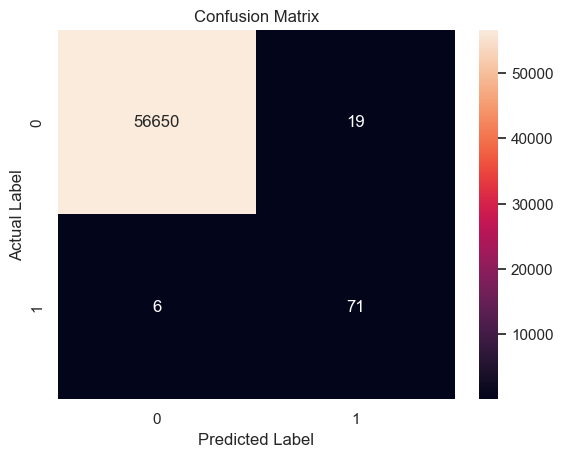

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


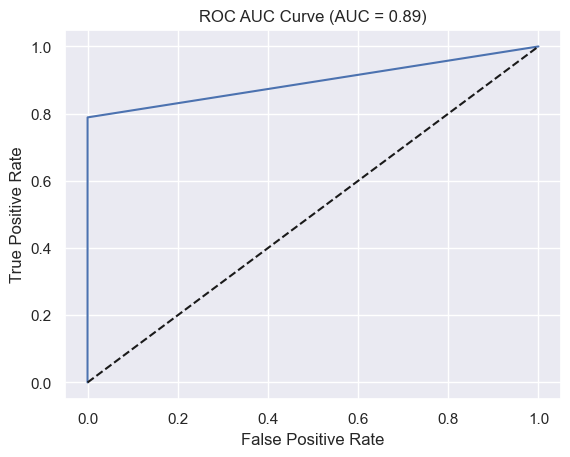

In [219]:
rf_score = evaluate_model(rf_model,y_rf_pred)

In [220]:
score['Random Forest'] = rf_score
score

,Logistic Regression,Random Forest
Accuracy Test,0.982113,0.999559
Precision Test,0.072155,0.922078
Recall Test,0.133219,0.850299
F1 Test,0.866667,0.788889
roc auc score,0.924482,0.894391


## XGBoost Model

In [221]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train_smote, y_train_smote)
y_xgb_pred = xgb_model.predict(x_test)

Testing Accuracy: 0.9994889507630493

Precision: 0.8674698795180723

Recall: 0.8

F1 Score: 0.8323699421965319

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.87      0.80      0.83        90

    accuracy                           1.00     56746
   macro avg       0.93      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746



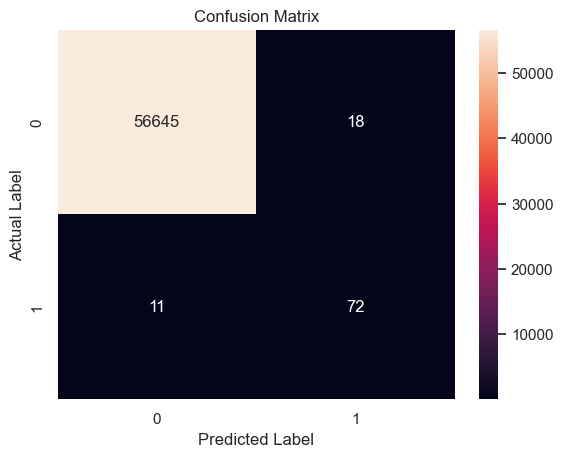

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


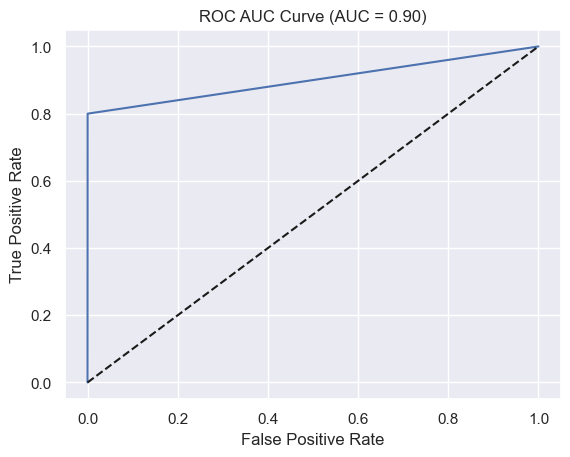

In [222]:
xgb_score = evaluate_model(xgb_model,y_xgb_pred)

In [223]:
score['XGBoost'] = xgb_score
score

,Logistic Regression,Random Forest,XGBoost
Accuracy Test,0.982113,0.999559,0.999489
Precision Test,0.072155,0.922078,0.867470
Recall Test,0.133219,0.850299,0.832370
F1 Test,0.866667,0.788889,0.800000
roc auc score,0.924482,0.894391,0.899903


## Decision Tree Model

In [224]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_smote, y_train_smote)
y_dt_pred = dt_model.predict(x_test)

Testing Accuracy: 0.9973566418778416

Precision: 0.34375

Recall: 0.7333333333333333

F1 Score: 0.4680851063829787

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.34      0.73      0.47        90

    accuracy                           1.00     56746
   macro avg       0.67      0.87      0.73     56746
weighted avg       1.00      1.00      1.00     56746



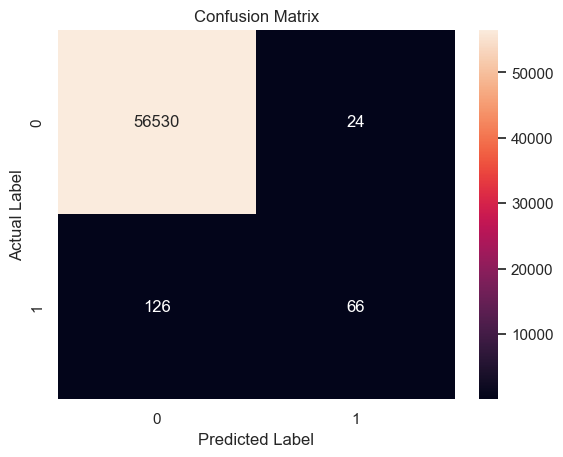

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


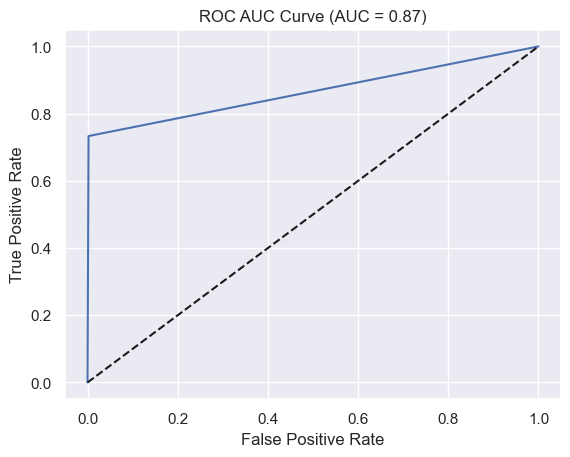

In [225]:
dt_score = evaluate_model(dt_model,y_dt_pred)

In [226]:
score['Decision Tree'] = dt_score
score

,Logistic Regression,Random Forest,XGBoost,Decision Tree
Accuracy Test,0.982113,0.999559,0.999489,0.997357
Precision Test,0.072155,0.922078,0.867470,0.343750
Recall Test,0.133219,0.850299,0.832370,0.468085
F1 Test,0.866667,0.788889,0.800000,0.733333
roc auc score,0.924482,0.894391,0.899903,0.865555


## Cat Boost Calssifier

In [227]:
cb_clf = CatBoostClassifier()
cb_clf.fit(x_train_smote, y_train_smote)

Learning rate set to 0.140335
0:	learn: 0.4388304	total: 29.2ms	remaining: 29.1s
1:	learn: 0.2995393	total: 61.6ms	remaining: 30.8s
2:	learn: 0.2149082	total: 92.1ms	remaining: 30.6s
3:	learn: 0.1783192	total: 113ms	remaining: 28s
4:	learn: 0.1462070	total: 133ms	remaining: 26.5s
5:	learn: 0.1255353	total: 154ms	remaining: 25.4s
6:	learn: 0.1115070	total: 175ms	remaining: 24.9s
7:	learn: 0.1029723	total: 196ms	remaining: 24.3s
8:	learn: 0.0952001	total: 216ms	remaining: 23.8s
9:	learn: 0.0882626	total: 237ms	remaining: 23.4s
10:	learn: 0.0844344	total: 256ms	remaining: 23s
11:	learn: 0.0797914	total: 275ms	remaining: 22.6s
12:	learn: 0.0750816	total: 295ms	remaining: 22.4s
13:	learn: 0.0717520	total: 324ms	remaining: 22.8s
14:	learn: 0.0679169	total: 344ms	remaining: 22.6s
15:	learn: 0.0656437	total: 364ms	remaining: 22.4s
16:	learn: 0.0629963	total: 383ms	remaining: 22.1s
17:	learn: 0.0605762	total: 403ms	remaining: 22s
18:	learn: 0.0579679	total: 424ms	remaining: 21.9s
19:	learn: 0.0

Testing Accuracy: 0.9991541254009093

Precision: 0.7019230769230769

Recall: 0.8111111111111111

F1 Score: 0.7525773195876289

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.70      0.81      0.75        90

    accuracy                           1.00     56746
   macro avg       0.85      0.91      0.88     56746
weighted avg       1.00      1.00      1.00     56746



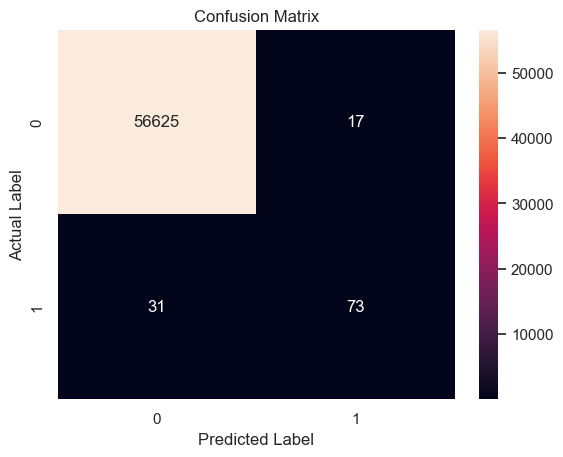

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


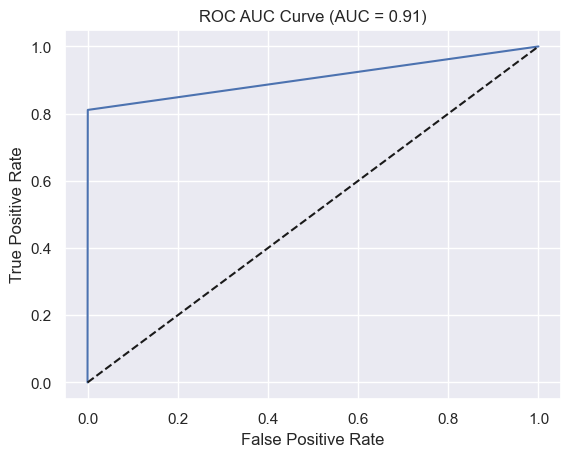

In [228]:
y_cat_pred = cb_clf.predict(x_test)
cat_score = evaluate_model(cb_clf,y_cat_pred)

In [229]:
score['Cat Boost'] = cat_score
score

,Logistic Regression,Random Forest,XGBoost,Decision Tree,Cat Boost
Accuracy Test,0.982113,0.999559,0.999489,0.997357,0.999154
Precision Test,0.072155,0.922078,0.867470,0.343750,0.701923
Recall Test,0.133219,0.850299,0.832370,0.468085,0.752577
F1 Test,0.866667,0.788889,0.800000,0.733333,0.811111
roc auc score,0.924482,0.894391,0.899903,0.865555,0.905282


## Artificial Neural Network

In [230]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Determine the number of features (input dimension)
input_dim = x_train.shape[1]


# Build model
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321 (63.75 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
# Define Early Stopping
early_stopping_nn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the model using training data
history = nn_model.fit(x_train_smote, y_train_smote, validation_data=(x_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_nn])

Epoch 1/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 8s 531us/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9987 - val_loss: 0.0090
Epoch 2/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 8s 531us/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9978 - val_loss: 0.0092
Epoch 3/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 503us/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9988 - val_loss: 0.0081
Epoch 4/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 473us/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0081
Epoch 5/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 517us/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9991 - val_loss: 0.0087
Epoch 6/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 500us/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9990 - val_loss: 0.0090
Epoch 7/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 518us/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9992 - val_loss: 0.0090
Epoch 8/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 501us/step - ac

In [232]:
## Evaludate the model with accuracy
loss, accuracy = nn_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.9989 - loss: 0.0064
Test Accuracy: 1.00


In [233]:
# Make predictions
y_pred_nn = nn_model.predict(x_test)

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step


In [234]:
# Convert the model's predicted probabilities into binary class labels (0 or 1)
## If probability > 0.5 → class 1 Else → class 0

y_pred = (y_pred_nn > 0.5).astype("int32")

Testing Accuracy: 0.9988016776512882

Precision: 0.5873015873015873

Recall: 0.8222222222222222

F1 Score: 0.6851851851851852

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.59      0.82      0.69        90

    accuracy                           1.00     56746
   macro avg       0.79      0.91      0.84     56746
weighted avg       1.00      1.00      1.00     56746



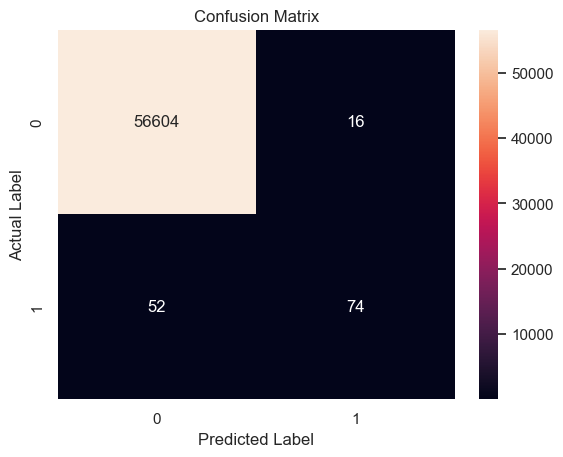

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


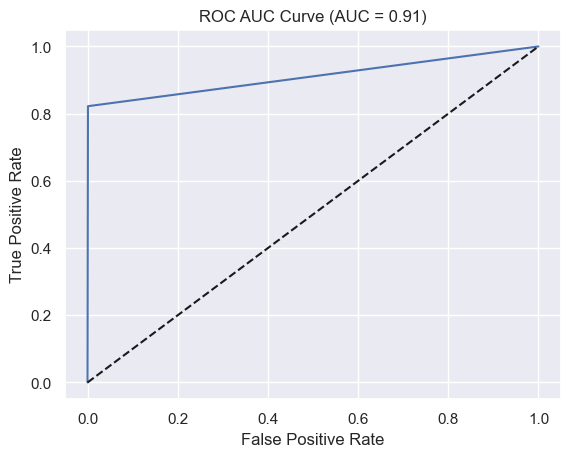

In [235]:
# Calculate metrics
test_acc_cnn = accuracy_score(y_test, y_pred)
test_prec_cnn = precision_score(y_test, y_pred)
test_recall_cnn = recall_score(y_test, y_pred)
test_f1_cnn = f1_score(y_test, y_pred)
auc_test_cnn = roc_auc_score(y_test, y_pred) # Use probabilities for AUC

nn_score = evaluate_model(nn_model,y_pred)

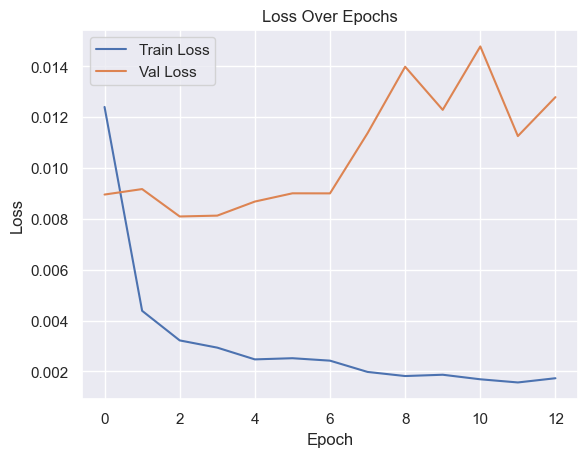

In [236]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

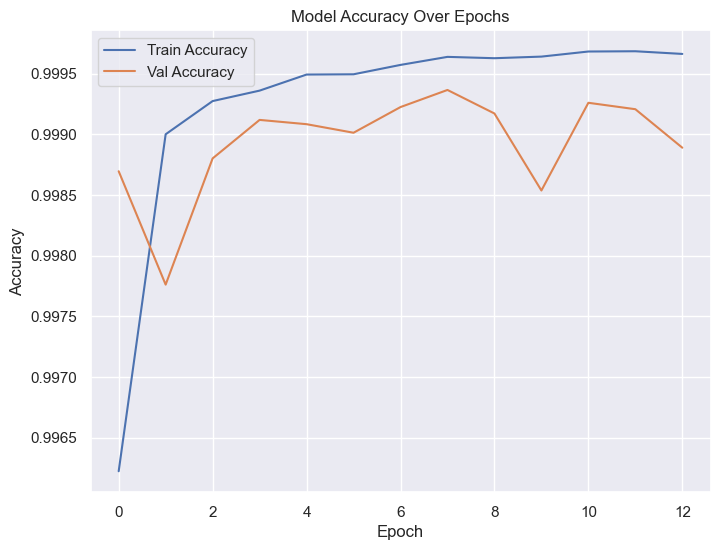

In [237]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [238]:
## Sensitivity (Recall or True Positive Rate) - 
## TPR = TP/TP + FN

## Specificity (True Negative Rate) - 
## TNR = TN/TN+FP

## Precision = TP/TP+FP

In [239]:
score['Neural network'] = nn_score
score.T

,Accuracy Test,Precision Test,Recall Test,F1 Test,roc auc score
Logistic Regression,0.982113,0.072155,0.133219,0.866667,0.924482
Random Forest,0.999559,0.922078,0.850299,0.788889,0.894391
XGBoost,0.999489,0.867470,0.832370,0.800000,0.899903
Decision Tree,0.997357,0.343750,0.468085,0.733333,0.865555
Cat Boost,0.999154,0.701923,0.752577,0.811111,0.905282
Neural network,0.998802,0.587302,0.685185,0.822222,0.910652


### Analysis

Based on the performance metrics above, here's an analysis of the best model for credit card fraud detection: We applied SMOTE technique for the resampling the target data by increasing the minority class using synthetic data
Note: While Random Forest shows the best performance, XGBoost is a very close second and might be preferred in some scenarios due to its speed and efficiency. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less. We can improve model performance by applying hyperparameter tuning using RandomizedSeachCV/GridSearchCV on Logistic regression and XGBoost model

## Hyperparameter tuning using RandomizedSearchCV on the XGBoost model

In [240]:
# Define the hyperparameter grid
xgb_param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
                  'max_depth': np.arange(3, 15, 1),
                  'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb = XGBClassifier(random_state=42)

# Repeated stratified kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Initialize RandomSearchCV
random_search_xgb = RandomizedSearchCV(xgb, xgb_param_grid,cv=kfold, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search_xgb.fit(x_train_smote, y_train_smote)

# Select the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
print("Best hyperparameters: ", best_params_xgb)

Best hyperparameters:  {'n_estimators': 160, 'max_depth': 12, 'learning_rate': 0.16}


In [241]:
# Building model with ideal hyperparamter
xgb_tuned_model = XGBClassifier(n_estimators = best_params_xgb['n_estimators'],
                                max_depth = best_params_xgb['max_depth'], 
                                learning_rate = best_params_xgb['learning_rate'])

Testing Accuracy: 0.9994360836006062

Precision: 0.8452380952380952

Recall: 0.7888888888888889

F1 Score: 0.8160919540229884

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.79      0.82        90

    accuracy                           1.00     56746
   macro avg       0.92      0.89      0.91     56746
weighted avg       1.00      1.00      1.00     56746



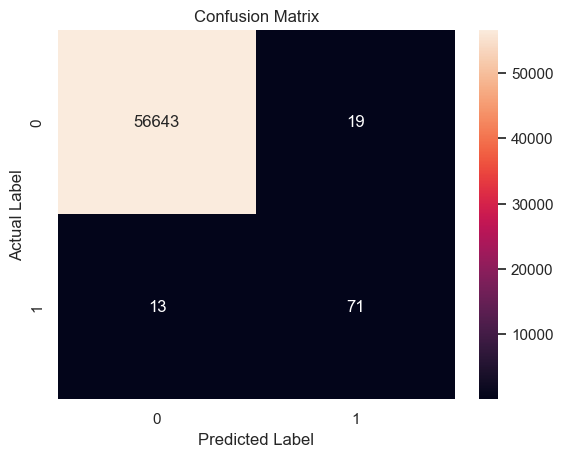

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


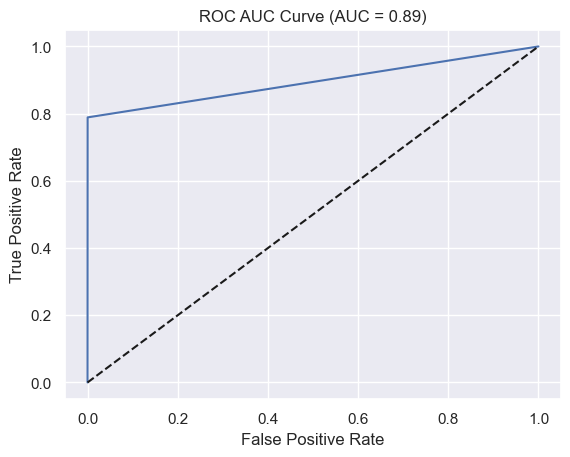

In [242]:
xgb_tuned_model.fit(x_train_smote, y_train_smote)
y_xgb_tune = xgb_tuned_model.predict(x_test)
xgb_tuned_score = evaluate_model(xgb_tuned_model,y_xgb_tune)

In [243]:
score['XGB tuned'] = xgb_tuned_score
score

,Logistic Regression,Random Forest,XGBoost,Decision Tree,Cat Boost,Neural network,XGB tuned
Accuracy Test,0.982113,0.999559,0.999489,0.997357,0.999154,0.998802,0.999436
Precision Test,0.072155,0.922078,0.867470,0.343750,0.701923,0.587302,0.845238
Recall Test,0.133219,0.850299,0.832370,0.468085,0.752577,0.685185,0.816092
F1 Test,0.866667,0.788889,0.800000,0.733333,0.811111,0.822222,0.788889
roc auc score,0.924482,0.894391,0.899903,0.865555,0.905282,0.910652,0.894330


<Axes: >

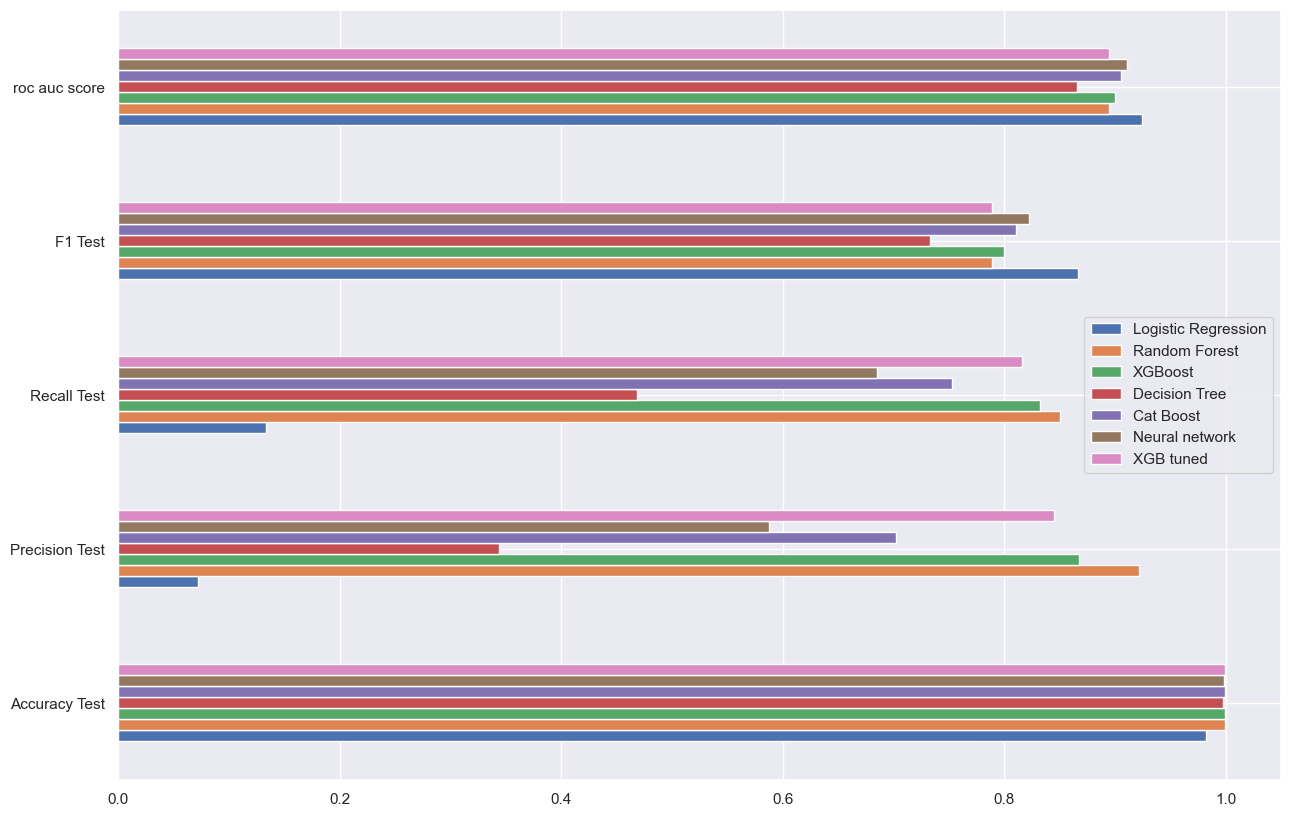

In [244]:
score.plot(kind='barh', figsize=(15, 10))

### Conclusion

Model Selection for Fraud Detection:

XGBoost Performance:

Base XGBoost (without tuning) showed strong results.
* Accuracy - 0.999489
* Precision - 0.867470
* Recall - 0.832370
  
Hyperparameter tuning didn't yield significant improvements. High precision and recall values make it ideal for fraud detection

Why XGBoost is the Preferred Choice:
* Better computational efficiency than Random Forest
* Faster training and prediction times
* Maintains high accuracy while being more resource-friendly


### Model Comparison:

* XGBoost: Best balance of performance and efficiency
* Random Forest: Good performance but slower
* Logistic Regression: Rejected due to:
Lower precision scores
Lower recall values
Not suitable for fraud detection where false negatives are costly

### Final Decision:
### Base XGBoost model selected because it:

1. Provides optimal performance metrics
2. Offers faster processing
3. Achieves high precision and recall without complex tuning
4. Best matches fraud detection requirements

In [245]:
## Save the model
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))